## Regression Trees (Árboles de Regresión)

In [1]:
#!conda install -c conda-forge graphviz -y

In [2]:
# CART: Classification and regression trees

<img src="tabla_arbol_regresion.png" alt="Alt text" style="width: 800px;"/>

### Intuitivamente: 

Un árbol de decisión (en este caso particular **árbol de regresión**) es un algoritmo cuyo objetivo es encontrar un conjunto de reglas sobre las variables predictoras que nos permitan estimar el valor de una variable contínua de interés.


###  La manera en que funciona un árbol de regresión es la siguiente:

1. **Dividir el conjunto de datos:** El algoritmo comienza dividiendo el conjunto de datos en subconjuntos más pequeños de tal forma que cada subconjunto sea lo más homogéneo posible con respecto a la variable objetivo. 


2. **Seleccionar la mejor división o 'split'**: Para cada subconjunto, el algoritmo busca la variable predictora que mejor separa los datos en dos grupos, en función de algún criterio (como la reducción del error cuadrático medio).


3. **Crear un nodo**: El algoritmo crea un nodo para cada subconjunto y le asigna la mejor predictora en función del split. El nodo representa un punto de decisión, donde los datos de entrada se dividen según la variable predictora que mejor separa y el valor del 'split'.


4. **Repetir:** Repite el proceso en cada subconjunto, creando nuevos nodos y dividiendo los datos aún más hasta que se alcance un criterio. Este puede ser el mínimo número de observaciones en una hoja, máxima profundidad del árbol, etc. 


5. **Predicciones:** Para hacer una predicción, los datos de entrada se alimentan por el árbol desde el nodo raíz hasta un nodo hoja, y se devuelve el valor objetivo correspondiente al nodo hoja como la predicción.

### Una explicación de cómo funciona un árbol de regresión. 

#### Si tuviéramos una relación lineal entre X (variable predictora) y Y (variable respuesta):

<img src="lamot_lineal.png" alt="Alt text" style="width: 500px;"/>

#### ¿Qué pasa si nuestros datos tienen la siguiente forma?


<img src="lamot_nolineal.png" alt="Alt text" style="width: 500px;"/>

<img src="explicacion_arbol1.png" alt="Alt text" style="width: 800px;"/>

In [3]:
#c

<img src="explicacion_arbol2.png" alt="Alt text" style="width: 800px;"/>

#### Y así sucesivamente...

#### Recordar que si tengo datos $x_1, x_2,..., x_n$ la varianza (muestral) pude expresarse como:
$$
s^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

Donde $\bar{x}$ es el promedio o media muestral

Para entender cómo se construye un árbol, consideremos el ejemplo con los siguientes datos:

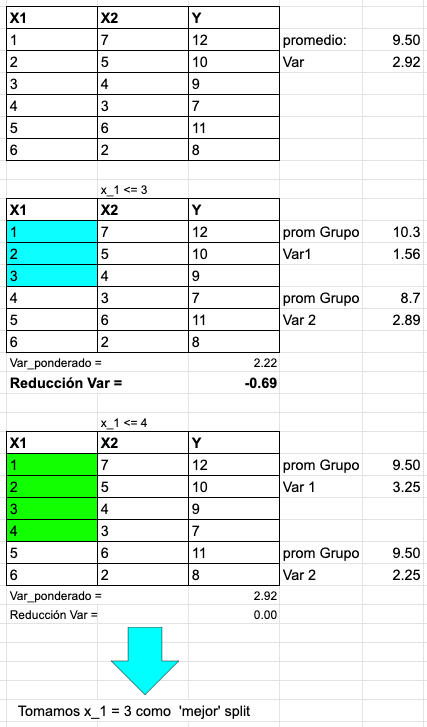

* Para decidir el mejor split, esto lo tendríamos que hacer para cada una de las variables predictoras y cada uno de sus posibles valores.

* Lo anterior implica una búsqueda exhaustiva sobre todo el espacio de variables y posibles puntos de corte para los splits.
* Si tenemos un conjunto de datos con 10 variables predictoras, el algoritmo considerará cada predictora como un posible punto de split
  (partición), y evaluará la calidad del split para CADA valor de esa v. predictora. Si una v.predictora tiene n valores distintos, hay n-1 posibles puntos de división. Por tanto, el algoritmo evaluará la calidad de la partición para un total de 10 * (n-1) posibles divisiones. 

In [4]:
# En general, el algoritmo del árbol buscar partir el espacio de variables predictoras en regiones que tienen una media
# similar en la variable respuesta.

#Además, la estructura del árbol arroja un modelo interpretable que ayuda a entender las asociaciones entre predictoras y 
# entre predictoras y respuesta.

In [5]:
#Costo computacional:
# Para reducir el costo computacional, algunas implementaciones de estos algoritmos utilizan heurísticas o muestreos aleatorios
# con el fin de reducir el espacio de búsqueda. E.G. el algoritmo de Random Forest

## Implementación de un Árbol de regresión

In [6]:
#Para fines comparativos, usaremos la base de boston housing y veremos el desempeño de los árboles vs las 
# técnicas vistas de regresiones lineales. 

In [7]:
## Importamos librerías:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [8]:
#leer los datos
df = pd.read_csv('boston_house_prices.csv')
df.head()

,id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,A1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,A2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,A3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,A4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,A5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Recordemos la descripción de las variables del dataset:

Input variables:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population

Target variable:

MEDV: Median value of owner-occupied homes in $1000s

In [9]:
predictors = df.loc[:,'CRIM':'LSTAT']
response = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.25, random_state=42)

#Iniciar una instancia de DecisionTreeRegressor y ajustar los datos (entrenar el  modelo):
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

# hacer predicciones sobre el conjunto de test y calcular el error cuadrático medio:
y_pred = reg_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: {: .2f}".format(mse))

Error cuadrático medio:  16.69


In [10]:
z = (y_pred - y_test)**2
z.sum()/len(z)

16.68842519685039

In [11]:
#Mejora vs OLS
16.69 / 24.88 -1  # mEJORAMOS el error de predicción en 32.9% vs OLS

-0.32918006430868163

In [12]:
#Mejora vs Ridge
16.69/21.79 - 1 # 23.4% de mejora vs Ridge

-0.23405231757687006

In [13]:
#Mejora vs LASSO:
16.69/22.11 -1

-0.24513794663048383

In [14]:
#Mejora vs Elastic Net
16.69/22.26 -1

-0.2502246181491464

In [15]:
# CHAID (Breiman & Friedman): Chi Squared automatic interaction detection -- leer opcional Elements of Statistical Learning

Los hiperparámetros más usados de la clase DecisionTreeRegressor son:

* **criterion:** la función usada para medir la calidad del split. El default es "mse" de mean squared error, pero también existen las opciones "friedman_mse" and "mae" (mean absolute error).

* **max_depth**: Máxima profundidad del árbol. Si es None, el árbol crece hasta que todas las hojas son 'puras' o hasta que todas las hojas contengan menos muestras que "min_samples_split". El default es None.

* **min_samples_split**: Mínimo número de muestras requeridas para hacer un split de un nodo interno. El default es 2.

* **min_samples_leaf**: mínimo número de muestras en un nodo hoja. El default es 1.

* **max_features**: El número de variables predictoras a considerar para buscar el mejor split. El default es "auto", que considera todas las predictoras

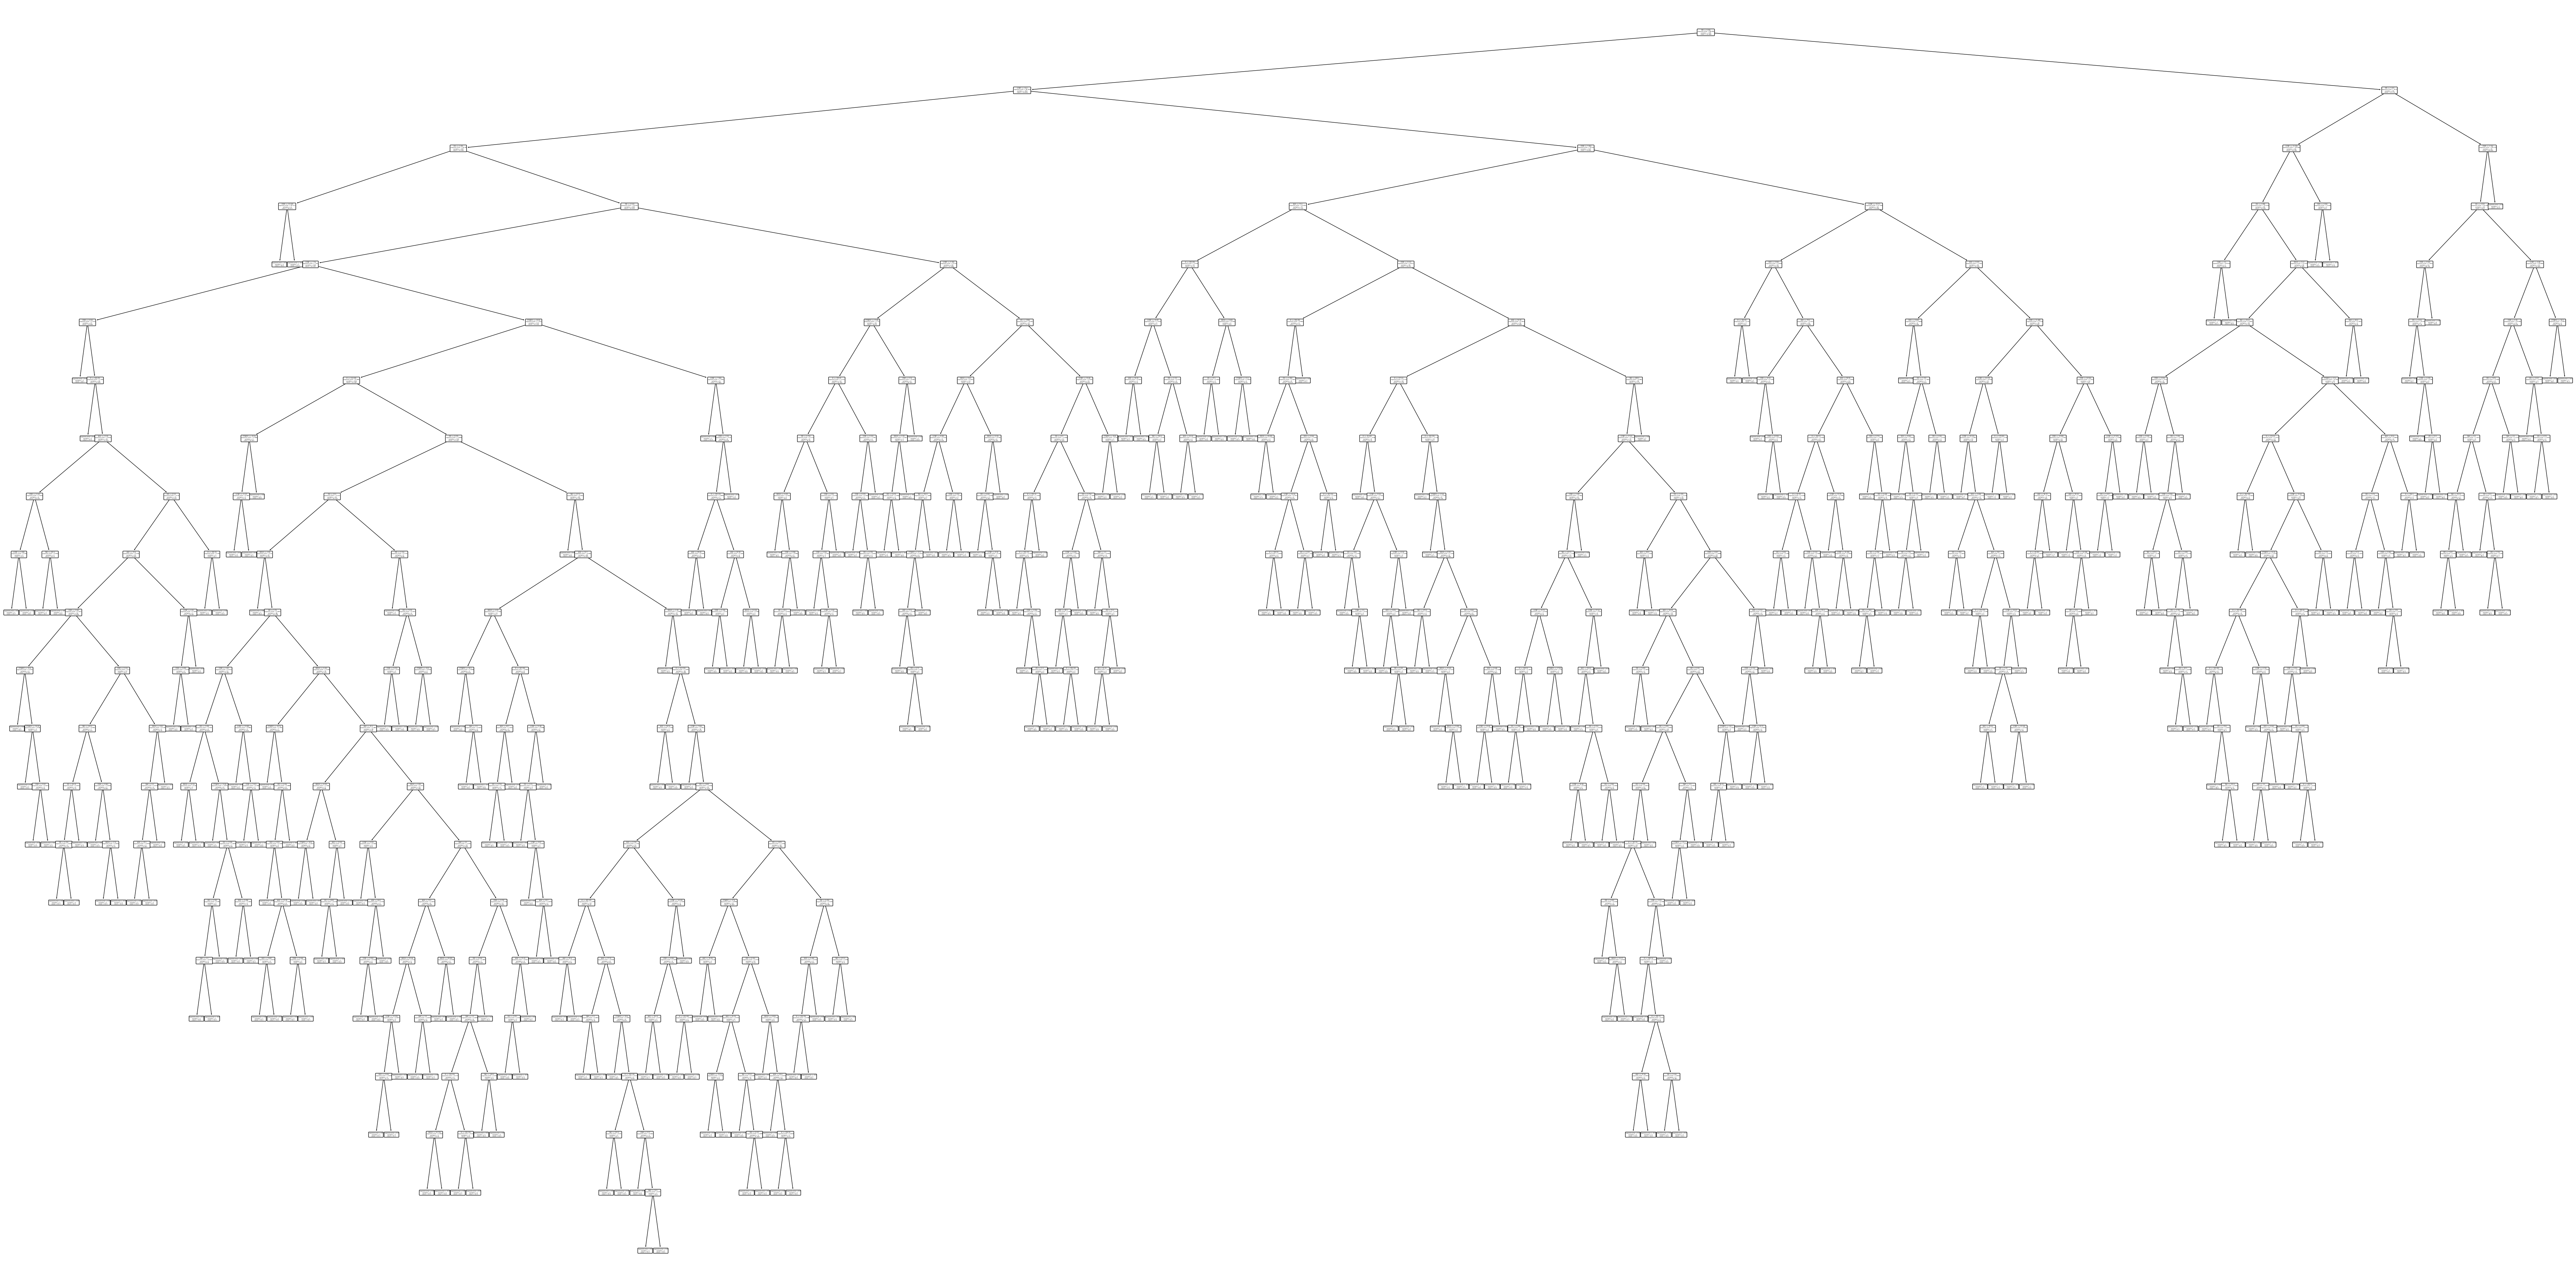

<Figure size 640x480 with 0 Axes>

In [16]:
# Visualizando el arbol de decisión
import matplotlib.pyplot as plt
plt.figure(figsize = (100,50))
plot_tree(reg_tree, feature_names = list(predictors.columns), fontsize = 3, rounded=True)
_= plt.show()
plt.savefig('boston_tree.png')


In [17]:
#importancias de variables:
reg_tree.feature_importances_

array([0.06632011, 0.00131505, 0.01145864, 0.00112659, 0.00703168,
       0.58716978, 0.01404119, 0.07391194, 0.00075809, 0.00563504,
       0.00958714, 0.0113011 , 0.21034365])

In [18]:
feat_imp = reg_tree.feature_importances_
indices = np.argsort(feat_imp)[::-1] #ordena la importancia de las variables en el modelo de forma DESCENDENTE

#Imprimir el ranking de importancia de las variables:
print("Importancia varaibles:")
for i in range(predictors.shape[1]):
    print(f"{i+1}. {predictors.columns[indices[i]]}:{feat_imp[indices[i]]}")

Importancia varaibles:
1. RM:0.5871697776508872
2. LSTAT:0.2103436474971849
3. DIS:0.07391194281531105
4. CRIM:0.0663201102458647
5. AGE:0.014041189625791416
6. INDUS:0.011458640883564965
7. B:0.011301099857865458
8. PTRATIO:0.009587141285407072
9. NOX:0.007031684490973873
10. TAX:0.00563503804109789
11. ZN:0.001315050669395411
12. CHAS:0.0011265866146406129
13. RAD:0.0007580903220156149


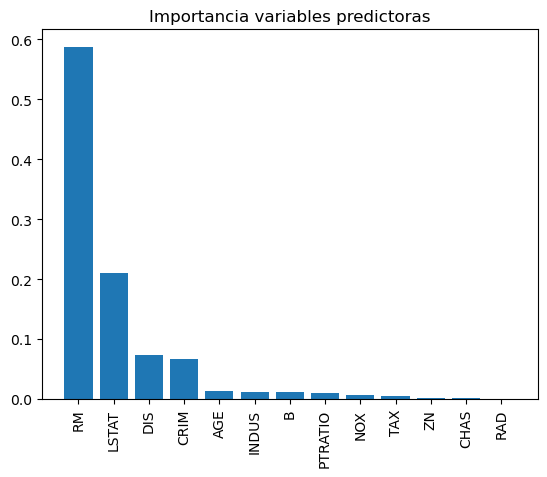

In [19]:
# Graficar importancia de variables
plt.title("Importancia variables predictoras")
plt.bar(range(predictors.shape[1]), feat_imp[indices])
plt.xticks(range(predictors.shape[1]), predictors.columns[indices], rotation=90)
plt.show()

In [20]:
# Graficar árbol y exportarlo

In [21]:
import graphviz
from sklearn.tree import export_graphviz 

In [22]:
dt_data = export_graphviz(reg_tree, out_file=None, 
                     feature_names=predictors.columns,  
                     class_names=df['MEDV'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dt_data)  
graph.render("arbol_reg_boston_housing")  

'arbol_reg_boston_housing.pdf'

### En función de la importancia de las variables, corramos otro modelo sólo con las más importantes y sólo con la intención de visualizarlo.

In [23]:
predictors2 = df[['RM', 'LSTAT', 'DIS', 'CRIM', 'AGE', 'INDUS']]
response = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(predictors2, response, test_size=0.25, random_state=42)

#Definir instancia de DecisionTreeRegressor y entrenarlo:
reg_tree = DecisionTreeRegressor(max_depth=4, random_state=42) #arbitrario max_depth
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:{:.2f}".format(mse))

MSE:14.70


In [24]:
14.70/16.69-1

-0.11923307369682457

In [25]:
feat_imp = reg_tree.feature_importances_
indices = np.argsort(feat_imp)[::-1] #ordenar la importancia de las variables en el modelo de forma descendente

#imprimir el ranking de importancia de variables:
print('Importancia variables:')
for i in range(predictors2.shape[1]):
    print(f"{i+1}.{predictors2.columns[indices[i]]}: {feat_imp[indices[i]]}")

Importancia variables:
1.RM: 0.6448631629993152
2.LSTAT: 0.20027587324461324
3.DIS: 0.07653164293614091
4.CRIM: 0.07097102144027323
5.AGE: 0.007358299379657389
6.INDUS: 0.0


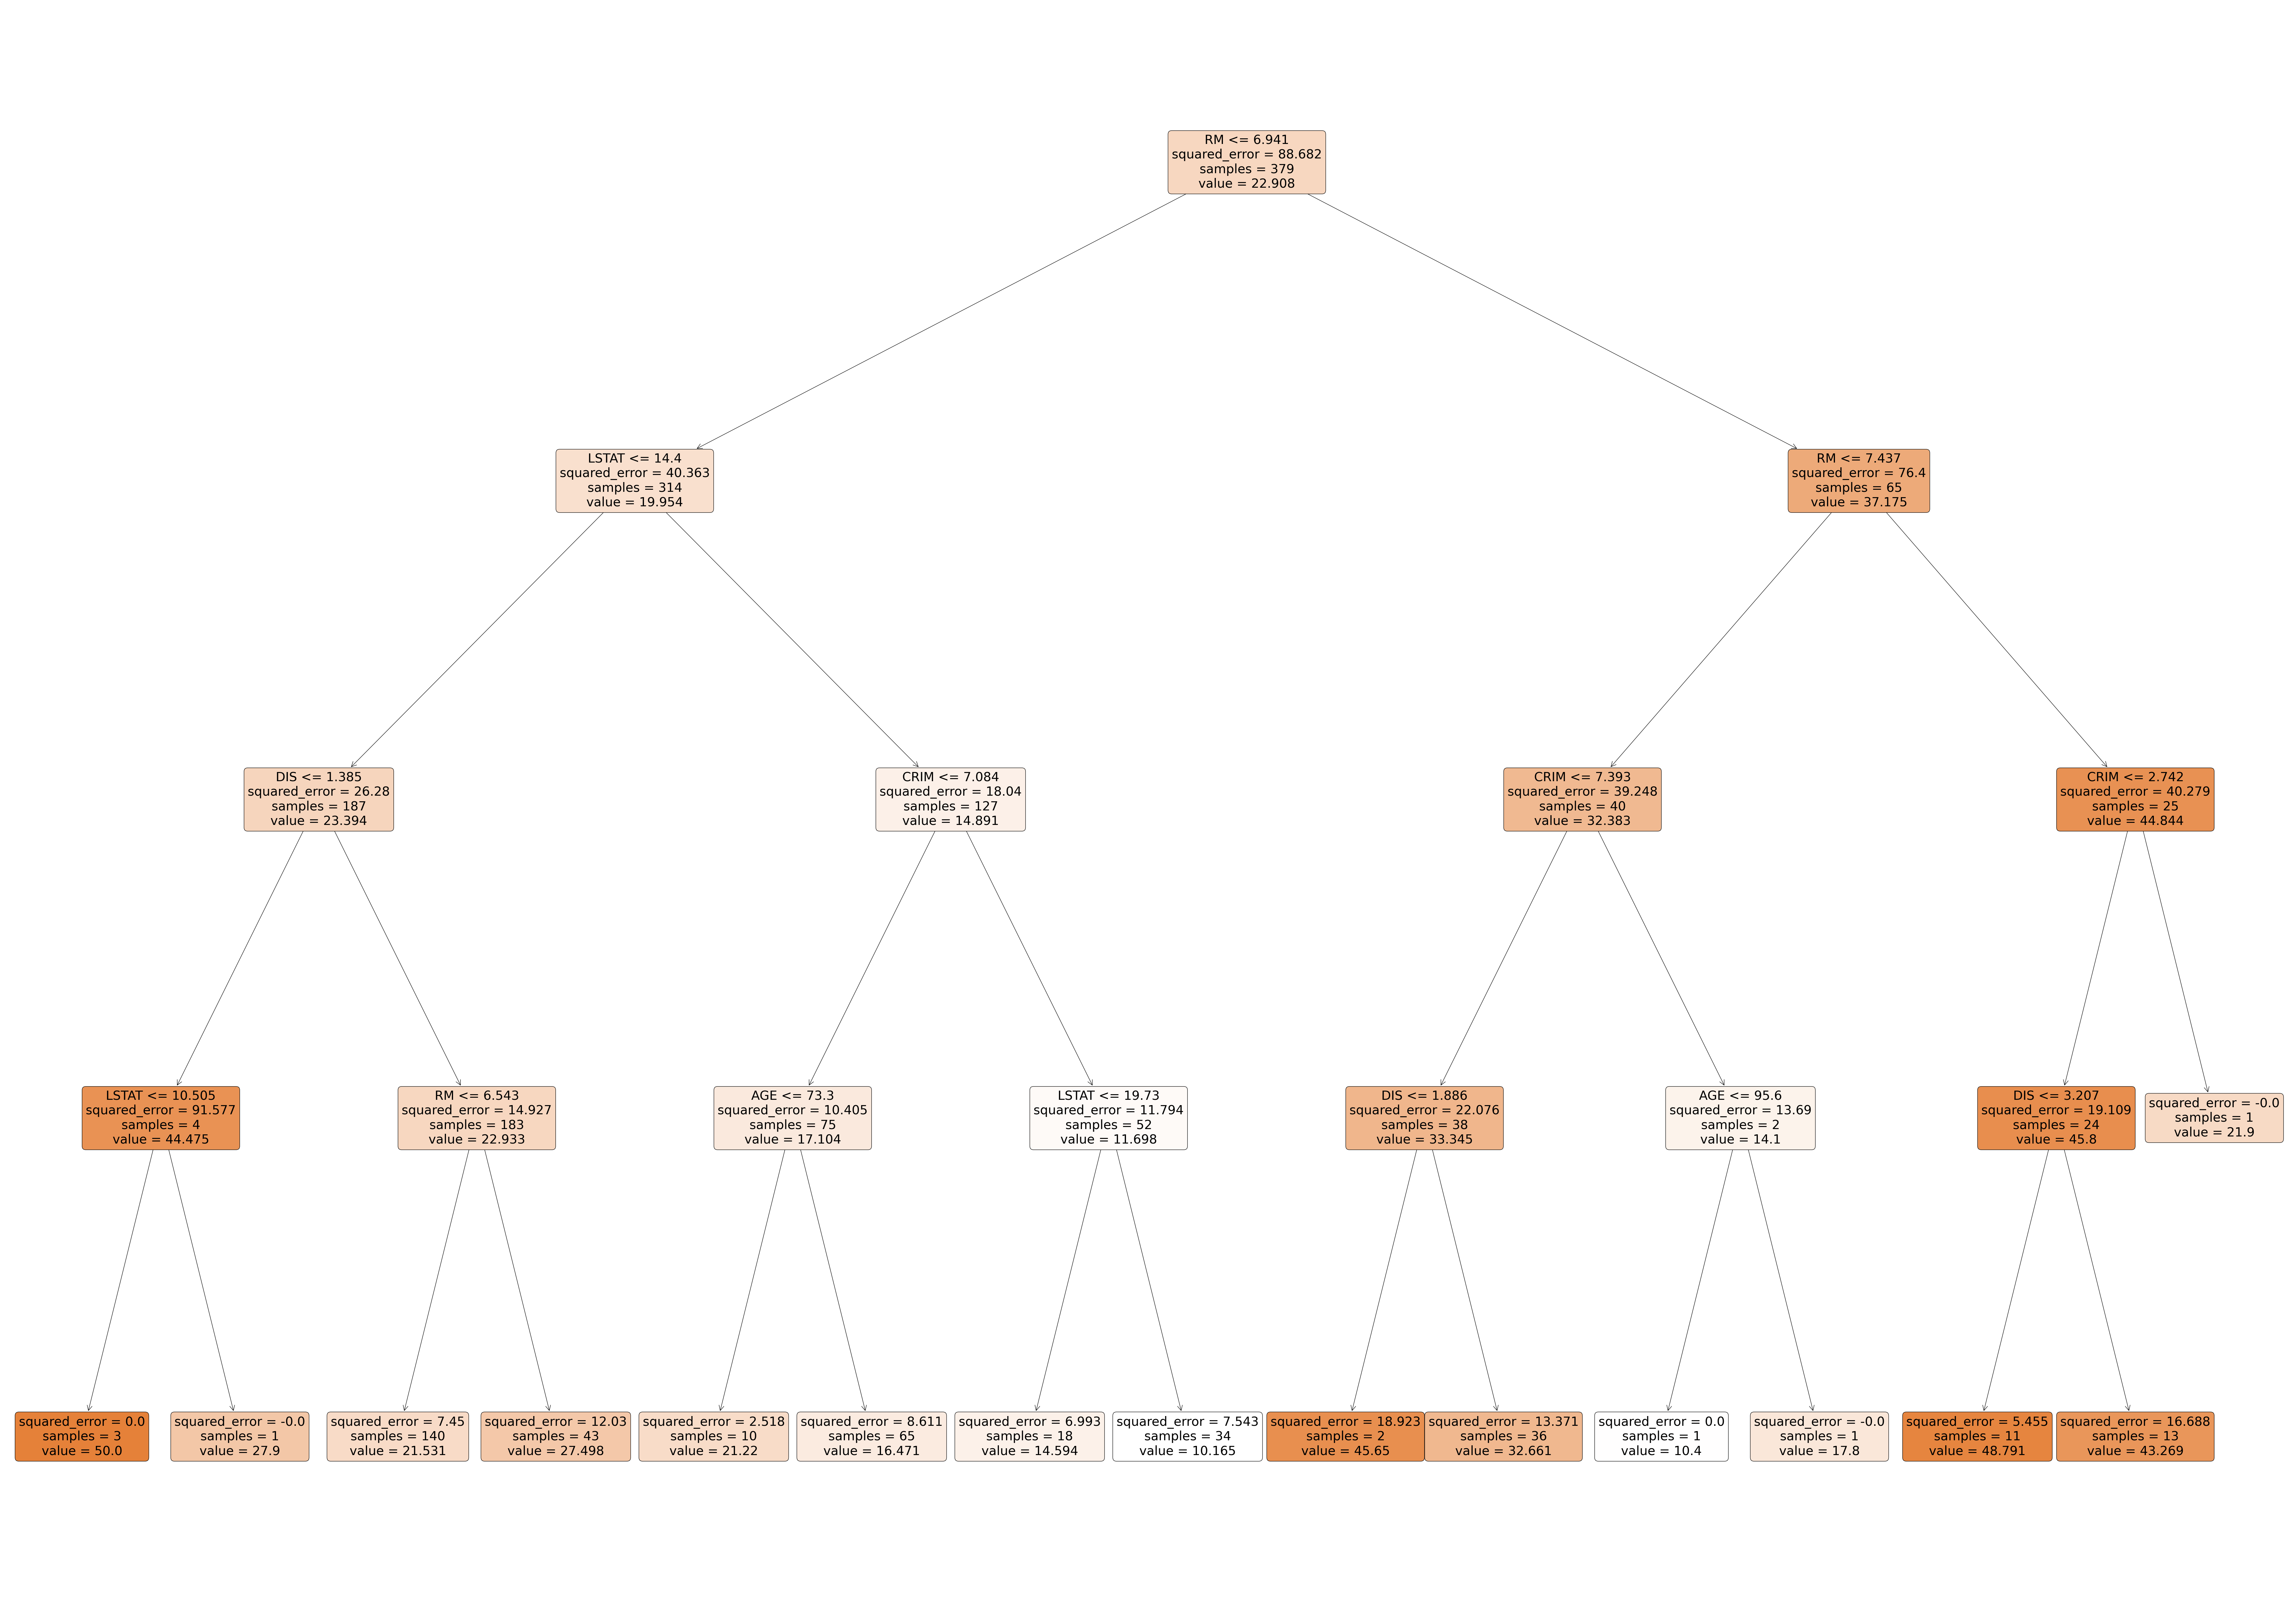

In [26]:
#Visualizar árbol
plt.figure(figsize= (100,70))
plot_tree(reg_tree, feature_names = list(predictors2.columns), filled = True, rounded=True)
plt.show()

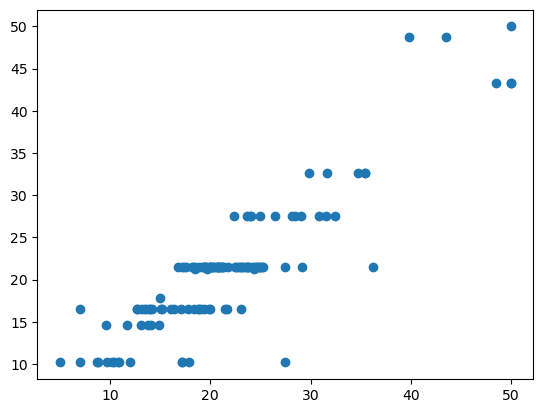

In [27]:
plt.scatter(y_test, y_pred)
plt.show()

In [28]:
# Hasta el momento, implementamos una versión 'básica' del árbol de decisión, logrando tener mejores resultados
# que con regresiones. 
# Veamos ahora cómo podemos mejorar aún más el desempeño del modelo a trvaés de los hiperparámetros.

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
predictors = df.loc[:, 'CRIM':'LSTAT']
response = df['MEDV']

X_train, X_test , y_train, y_test = train_test_split(predictors, response, test_size=0.25,
                                                    random_state=42)
reg_tree = DecisionTreeRegressor(random_state=42)

#definir un espacio de hiperparámetros sobre los cuales buscar:
param_grid = {
    'max_depth': range(3,12),
    'min_samples_split': [2,3,4,5,10,20]
}

#Crear instancia de la clase GridSearchCV
grid_search = GridSearchCV(reg_tree, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train) #entrenamiento

#Ver los 'mejores' hiperparámetros
print("mejores hiperparámetros:", grid_search.best_params_)

mejores hiperparámetros: {'max_depth': 6, 'min_samples_split': 4}


In [31]:
#predicciones sobre el conjunto de test:
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:{:.2f}".format(mse))

MSE:11.34


In [32]:
11.34/14.70-1  # casi 23% adicional de mejora en predicción vs nuestro último árbol

-0.22857142857142854

In [33]:
11.34/24.88 -1 #mejora vs OLS = 54.4% EN ERROR DE PREDICCIÓN

-0.5442122186495177

### Ventajas de los árboles de regresión vs regresiones lineales:
1. No requieren supuestos sobre la forma funcional de la relación entre variables predictoras y variable respuesta.
2. Pueden manejar de forma más efectiva variables categóricas, ordinales, y relaciones no lineas. Son útiles para datos que no siguen una
distribución Gaussiana. De hecho no hay supuestos acerca de la distrución de la variable respuesta.
3. No se ven tan afectados por valores atípicos o nulos.
4. Son fáciles de interpretar.

### Debilidades de los árboles de regresión
1. Pueden ser sensibles al ruido en los datos y sobreajustar el modelo a los datos de entrenamiento.
2. Variaciones medianamente pequeñas en los datos pueden dar lugar a árboles de regresión diferentes.
3. Capacidad de manejar relaciones muy complejas es un poco más limitada compara con modelos como Redes Neuronales.
4. Sesgo inherente por la forma en que parten las regiones. 

### Introducción: Ensamble de árboles de regresión:

In [34]:
from sklearn.ensemble import RandomForestRegressor # ensemble of weak learners

param_grid = {
    'n_estimators': [10, 20, 50, 100], #con cuántos árboles voy a probar / construir mi modelo.
    'max_depth': range(3, 12),
    'min_samples_split': [2,3,4,5,10,20]
}

#definir una instancia de RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# mejores hiperparámetros:
print("mejores hiperparámetros:", grid_search.best_params_)

best_rf = grid_search.best_estimator_  #guarda el mejor estimador/modelo
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: {: .2f}".format(mse))

mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
MSE:  10.15


In [35]:
10.15/11.34-1 #mejoramos nuestro modelo 10.5% más, PERO CON 100 árboles!!

-0.10493827160493818

In [36]:
# gracias a que el parámetro Refit=True se puede hacer predict directo desde el grid_search:
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: {: .2f}".format(mse))

MSE:  10.15


1. Creamos un conjunto de datos $D$, tomando muestras aleatorias con reemplazo del dataset  original
2. Entrenamos un árbol de decisión sobre $D$, usando sólo algunas columnas seleccionadas aleatoriamente.
3. Repetir pasos 1 y 2 varias veces. 
4. Al final, se toma el promedio / moda de las predicciones hechas por cada estimador

In [ ]:
#fin